In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from dateutil import parser
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('Fake.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumns in the dataset:")
print(df.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))

Dataset Overview:
Number of rows: 23481
Number of columns: 4

Columns in the dataset:
['title', 'text', 'subject', 'date']

First few rows of the dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  Decem

In [ ]:
# Convert date strings to datetime objects with flexible format detection
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

# Check for any missing dates after conversion
missing_dates = df['date'].isna().sum()
print(f"\nNumber of rows with invalid dates: {missing_dates}")

# Extract year, month, and day from valid date entries
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Count of news articles by subject
subject_counts = df['subject'].value_counts()
print("\nFrequency distribution of news articles by subject:")
print(subject_counts)

# Count of news articles by year and month (for valid dates)
df_with_dates = df.dropna(subset=['date'])
monthly_counts = df_with_dates.groupby([df_with_dates['date'].dt.year,
                                         df_with_dates['date'].dt.month]).size()
print("\nFrequency distribution of news articles by year and month:")
print(monthly_counts)

# Additional analysis: Distribution by day of week
df['day_of_week'] = df['date'].dt.day_name()
day_of_week_counts = df['day_of_week'].value_counts()
print("\nFrequency distribution by day of week:")
print(day_of_week_counts)


Number of rows with invalid dates: 10

Frequency distribution of news articles by subject:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

Frequency distribution of news articles by year and month:
date  date
2015  3          8
      4        326
      5        338
      6        236
      7        291
      8        220
      9        202
      10       281
      11       276
      12       301
2016  1       1081
      2       1020
      3       1088
      4        977
      5       1012
      6        871
      7        883
      8        892
      9        936
      10      1082
      11      1004
      12       908
2017  1       1029
      2        879
      3       1066
      4        805
      5        827
      6        814
      7        777
      8        795
      9        636
      10       605
      11       523
      12       447
2018  2      

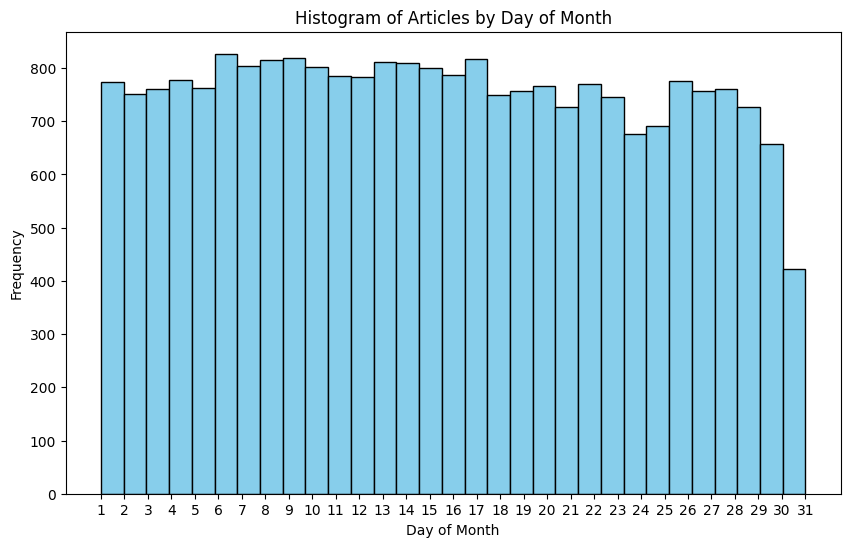

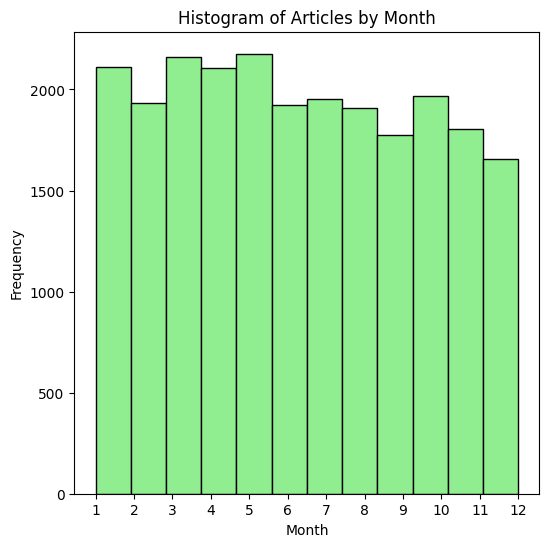

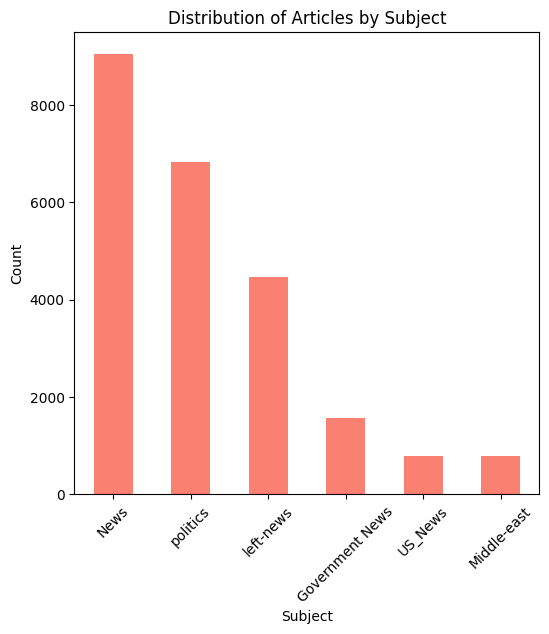

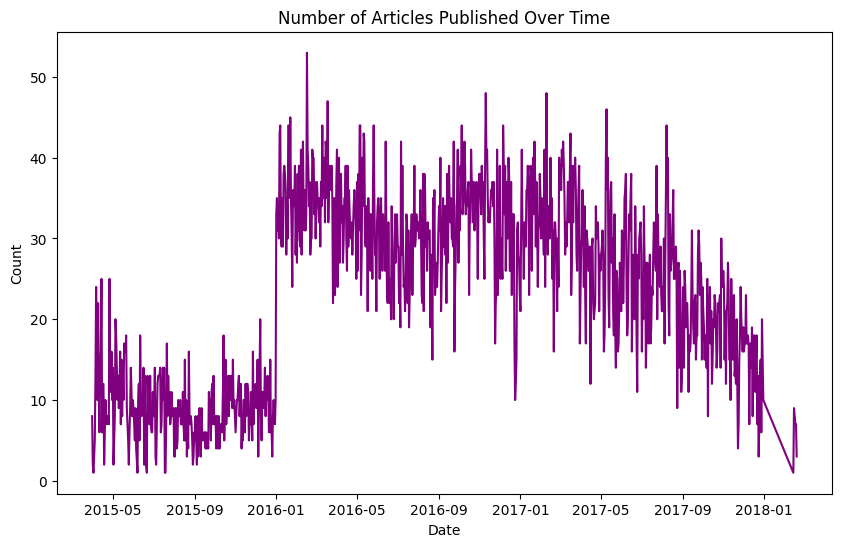

<Figure size 640x480 with 0 Axes>

In [ ]:
# Histogram of articles by day of month
plt.figure(figsize=(10,6))
plt.hist(df['day'], bins=31, color='skyblue', edgecolor='black')
plt.title('Histogram of Articles by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 32))
plt.show()

# Histogram of articles by month
plt.figure(figsize=(6,6))
plt.hist(df['month'], bins=12, color='lightgreen', edgecolor='black')
plt.title('Histogram of Articles by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))
plt.show()

# Bar chart of subjects
plt.figure(figsize=(6,6))
subject_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Articles by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Time series of article counts
plt.figure(figsize=(10,6))
df.groupby(df['date'].dt.date).size().plot(color='purple')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()
plt.tight_layout()

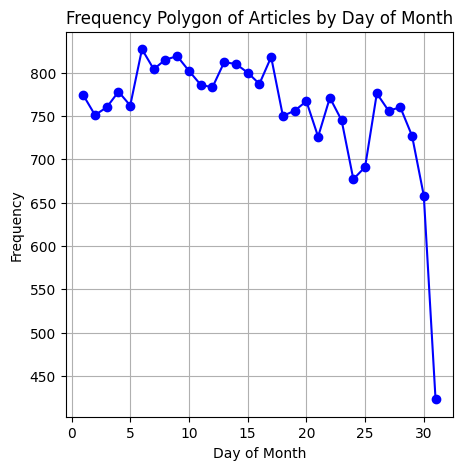

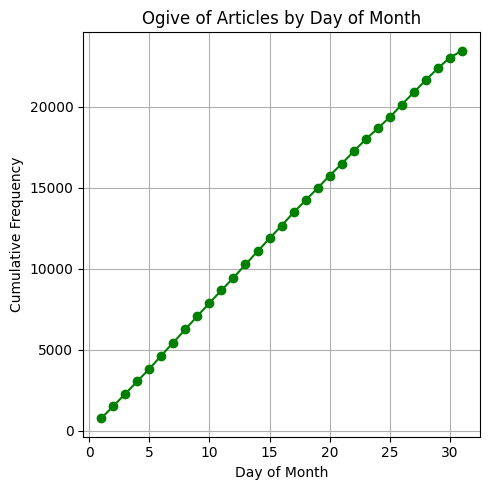

In [ ]:
# Frequency polygon of articles by day
plt.figure(figsize=(5,5))
day_counts = df['day'].value_counts().sort_index()
plt.plot(day_counts.index, day_counts.values, 'o-', color='blue')
plt.title('Frequency Polygon of Articles by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Ogive (cumulative frequency) of articles by day
plt.figure(figsize=(5,5))
day_cumulative = day_counts.sort_index().cumsum()
plt.plot(day_cumulative.index, day_cumulative.values, 'o-', color='green')
plt.title('Ogive of Articles by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

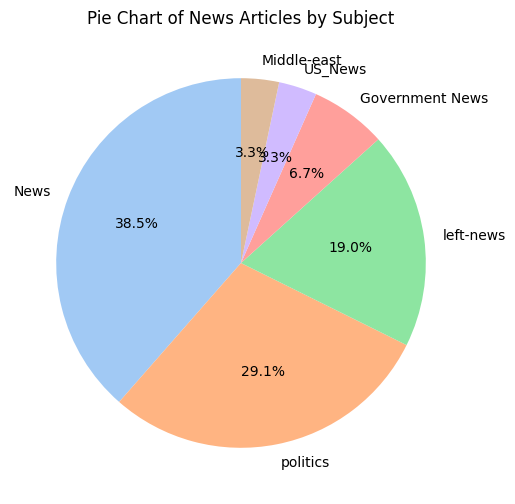

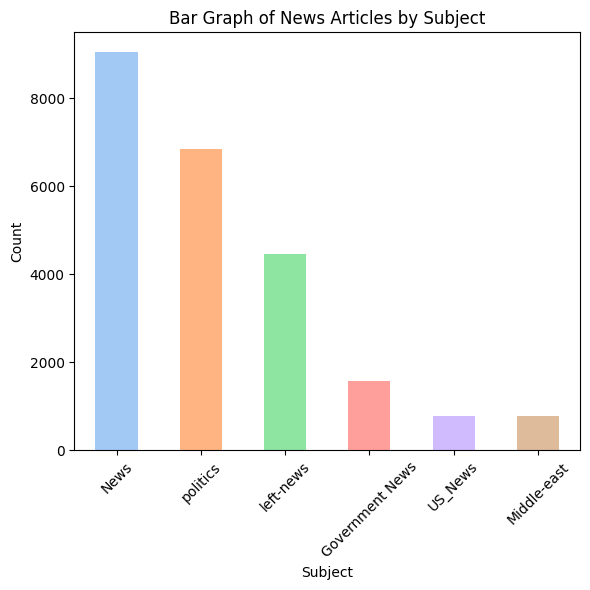

<ipython-input-14-4c1e35da2be2>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(subject_sorted.index, rotation=45, ha='right')


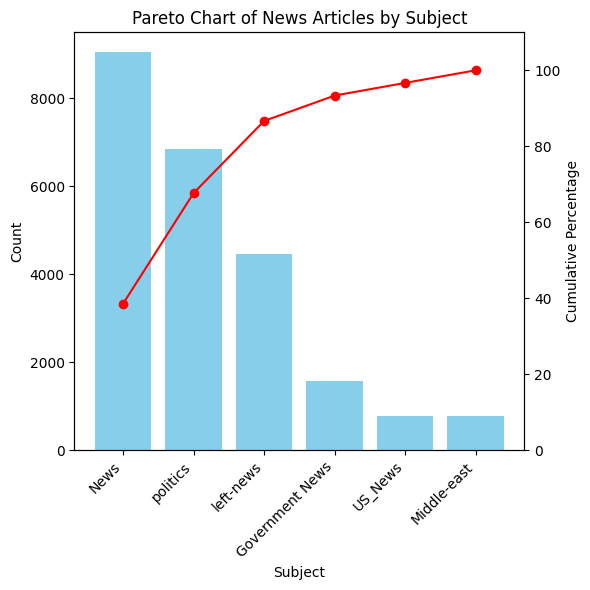

In [ ]:
# Pie chart
plt.figure(figsize=(6,6))
subject_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of News Articles by Subject')
plt.ylabel('')  # Hide the ylabel
plt.show()

# Bar graph
plt.figure(figsize=(6,6))
subject_counts.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Bar Graph of News Articles by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a Pareto chart for subject distribution
plt.figure(figsize=(6,6))
subject_sorted = subject_counts.sort_values(ascending=False)
cumpercentage = subject_sorted.cumsum() / subject_sorted.sum() * 100

ax1 = plt.subplot(1, 1, 1)
ax1.bar(subject_sorted.index, subject_sorted.values, color='skyblue')
ax1.set_title('Pareto Chart of News Articles by Subject')
ax1.set_xlabel('Subject')
ax1.set_ylabel('Count')
ax1.set_xticklabels(subject_sorted.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(subject_sorted.index, cumpercentage, 'o-', color='red')
ax2.set_ylabel('Cumulative Percentage')
ax2.set_ylim([0, 110])

plt.tight_layout()
plt.show()


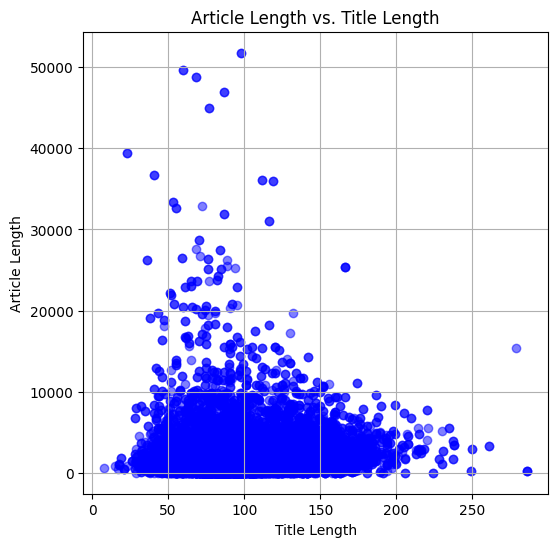

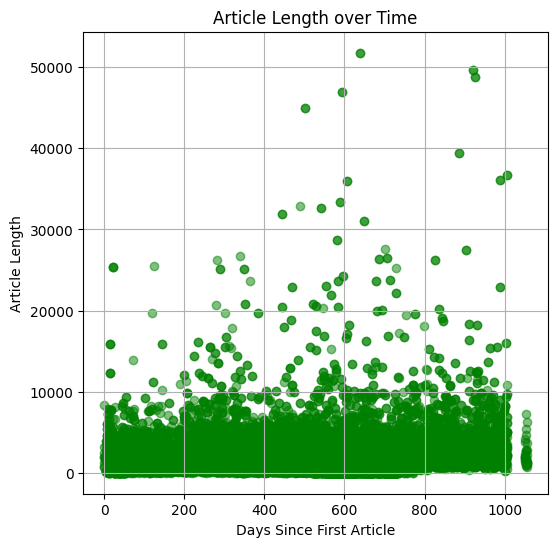

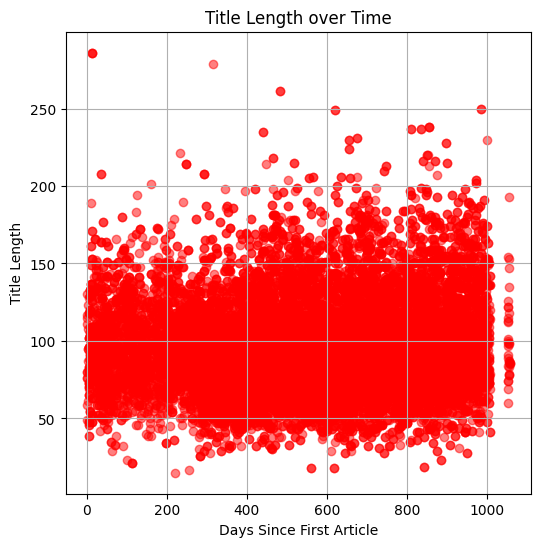

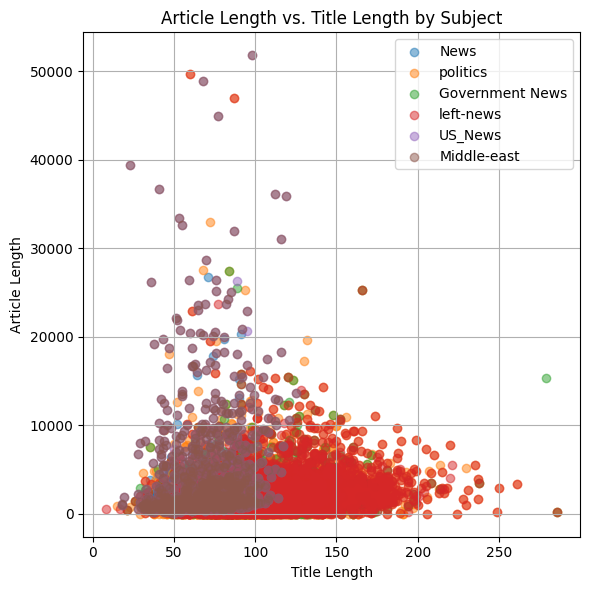

In [ ]:
# Create time-based variables for scatter plot analysis
df['article_length'] = df['text'].apply(lambda x: len(str(x)))
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Scatter plot of article length vs. title length
plt.figure(figsize=(6,6))
plt.scatter(df['title_length'], df['article_length'], alpha=0.5, color='blue')
plt.title('Article Length vs. Title Length')
plt.xlabel('Title Length')
plt.ylabel('Article Length')
plt.grid(True)
plt.show()

# Scatter plot of article length over time
plt.figure(figsize=(6,6))
plt.scatter(df['days_since_start'], df['article_length'], alpha=0.5, color='green')
plt.title('Article Length over Time')
plt.xlabel('Days Since First Article')
plt.ylabel('Article Length')
plt.grid(True)
plt.show()

# Scatter plot of title length over time
plt.figure(figsize=(6,6))
plt.scatter(df['days_since_start'], df['title_length'], alpha=0.5, color='red')
plt.title('Title Length over Time')
plt.xlabel('Days Since First Article')
plt.ylabel('Title Length')
plt.grid(True)
plt.show()

# Scatter plot with categorical variable (subject)
plt.figure(figsize=(6,6))
for subject in df['subject'].unique():
    subset = df[df['subject'] == subject]
    plt.scatter(subset['title_length'], subset['article_length'], alpha=0.5, label=subject)
plt.title('Article Length vs. Title Length by Subject')
plt.xlabel('Title Length')
plt.ylabel('Article Length')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate central tendency measures for numerical features
print("\n--- Measures of Central Tendency ---")

# For title length
print("\nTitle Length:")
title_mean = df['title_length'].mean()
title_median = df['title_length'].median()
title_mode = df['title_length'].mode()[0]
title_weighted_mean = np.average(df['title_length'], weights=df['article_length'])
title_geometric_mean = stats.gmean(df['title_length'])
title_harmonic_mean = stats.hmean(df['title_length'])

print(f"Mean: {title_mean:.2f}")
print(f"Median: {title_median:.2f}")
print(f"Mode: {title_mode}")
print(f"Weighted Mean (weighted by article length): {title_weighted_mean:.2f}")
print(f"Geometric Mean: {title_geometric_mean:.2f}")
print(f"Harmonic Mean: {title_harmonic_mean:.2f}")

# For article length
print("\nArticle Length:")
article_mean = df['article_length'].mean()
article_median = df['article_length'].median()
article_mode = df['article_length'].mode()[0]
article_geometric_mean = stats.gmean(df['article_length'])
article_harmonic_mean = stats.hmean(df['article_length'])

print(f"Mean: {article_mean:.2f}")
print(f"Median: {article_median:.2f}")
print(f"Mode: {article_mode}")
print(f"Geometric Mean: {article_geometric_mean:.2f}")
print(f"Harmonic Mean: {article_harmonic_mean:.2f}")

# For day of month
print("\nDay of Month:")
day_mean = df['day'].mean()
day_median = df['day'].median()
day_mode = df['day'].mode()[0]

print(f"Mean: {day_mean:.2f}")
print(f"Median: {day_median:.2f}")
print(f"Mode: {day_mode}")

# Group by subject and calculate mean article length
subject_means = df.groupby('subject')['article_length'].mean().sort_values(ascending=False)
print("\nMean Article Length by Subject:")
print(subject_means)


--- Measures of Central Tendency ---

Title Length:
Mean: 94.20
Median: 90.00
Mode: 89
Weighted Mean (weighted by article length): 94.89
Geometric Mean: 90.57
Harmonic Mean: 86.99

Article Length:
Mean: 2547.40
Median: 2166.00
Mode: 1
Geometric Mean: 1556.02
Harmonic Mean: 35.77

Day of Month:
Mean: 15.52
Median: 15.00
Mode: 6.0

Mean Article Length by Subject:
subject
US_News            4847.337165
Middle-east        4799.847044
News               2622.963646
left-news          2370.988562
Government News    2352.573885
politics           2087.715977
Name: article_length, dtype: float64


In [ ]:
# Calculate quartiles, deciles, and percentiles
print("\n--- Quartiles, Deciles, and Percentiles ---")

# For title length
title_quartiles = np.percentile(df['title_length'], [25, 50, 75])
title_deciles = np.percentile(df['title_length'], np.arange(10, 100, 10))
title_percentiles = np.percentile(df['title_length'], [1, 5, 10, 25, 50, 75, 90, 95, 99])

print("\nTitle Length:")
print(f"Quartiles (25%, 50%, 75%): {title_quartiles}")
print(f"Deciles: {title_deciles}")
print(f"Key Percentiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): {title_percentiles}")

# For article length
article_quartiles = np.percentile(df['article_length'], [25, 50, 75])
article_deciles = np.percentile(df['article_length'], np.arange(10, 100, 10))
article_percentiles = np.percentile(df['article_length'], [1, 5, 10, 25, 50, 75, 90, 95, 99])

print("\nArticle Length:")
print(f"Quartiles (25%, 50%, 75%): {article_quartiles}")
print(f"Deciles: {article_deciles}")
print(f"Key Percentiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): {article_percentiles}")


--- Quartiles, Deciles, and Percentiles ---

Title Length:
Quartiles (25%, 50%, 75%): [ 77.  90. 105.]
Deciles: [ 66.  74.  80.  85.  90.  95. 101. 111. 132.]
Key Percentiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): [ 43.  58.  66.  77.  90. 105. 132. 147. 179.]

Article Length:
Quartiles (25%, 50%, 75%): [1433. 2166. 3032.]
Deciles: [ 502. 1202. 1638. 1934. 2166. 2450. 2813. 3301. 4275.]
Key Percentiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): [1.0000e+00 1.2600e+02 5.0200e+02 1.4330e+03 2.1660e+03 3.0320e+03
 4.2750e+03 5.6390e+03 1.1827e+04]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.dates as mdates
from datetime import datetime

# Load the dataset
df_true = pd.read_csv('True.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of rows: {df_true.shape[0]}")
print(f"Number of columns: {df_true.shape[1]}")
print("\nColumns in the dataset:")
print(df_true.columns.tolist())
print("\nFirst few rows of the dataset:")
print(df_true.head())
print("\nDataset information:")
print(df_true.info())
print("\nSummary statistics:")
print(df_true.describe(include='all'))

Dataset Overview:
Number of rows: 21417
Number of columns: 4

Columns in the dataset:
['title', 'text', 'subject', 'date']

First few rows of the dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31,

In [ ]:
# Convert date strings to datetime objects with flexible format detection
df_true['date'] = pd.to_datetime(df_true['date'], errors='coerce')

# Check for any missing dates after conversion
missing_dates = df_true['date'].isna().sum()
print(f"\nNumber of rows with invalid dates: {missing_dates}")

# Extract year, month, and day from valid date entries
df_true['year'] = df_true['date'].dt.year
df_true['month'] = df_true['date'].dt.month
df_true['day'] = df_true['date'].dt.day

# Count of news articles by subject
subject_counts = df_true['subject'].value_counts()
print("\nFrequency distribution of news articles by subject:")
print(subject_counts)

# Count of news articles by year and month (for valid dates)
df_with_dates = df_true.dropna(subset=['date'])
monthly_counts = df_with_dates.groupby([df_with_dates['date'].dt.year,
                                         df_with_dates['date'].dt.month]).size()
print("\nFrequency distribution of news articles by year and month:")
print(monthly_counts)

# Additional analysis: Distribution by day of week
df_true['day_of_week'] = df_true['date'].dt.day_name()
day_of_week_counts = df_true['day_of_week'].value_counts()
print("\nFrequency distribution by day of week:")
print(day_of_week_counts)


Number of rows with invalid dates: 0

Frequency distribution of news articles by subject:
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

Frequency distribution of news articles by year and month:
date  date
2016  1        246
      2        432
      3        490
      4        383
      5        394
      6        419
      7        338
      8        265
      9        351
      10       336
      11       637
      12       425
2017  1        750
      2        591
      3        684
      4        543
      5        505
      6        556
      7        540
      8        657
      9       3074
      10      3172
      11      3096
      12      2533
dtype: int64

Frequency distribution by day of week:
day_of_week
Wednesday    4184
Thursday     4106
Tuesday      3749
Friday       3695
Monday       3064
Sunday       1427
Saturday     1192
Name: count, dtype: int64


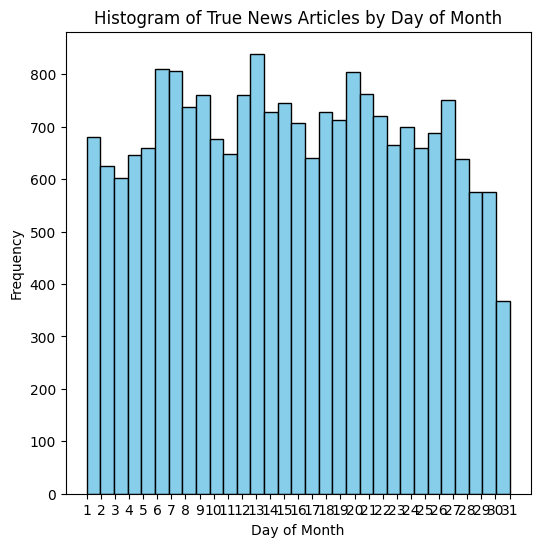

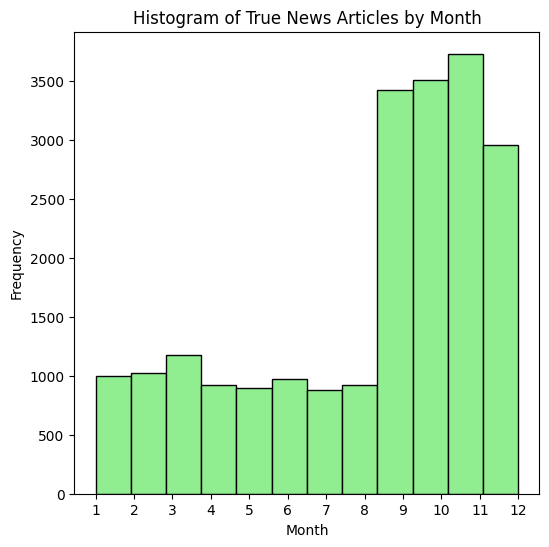

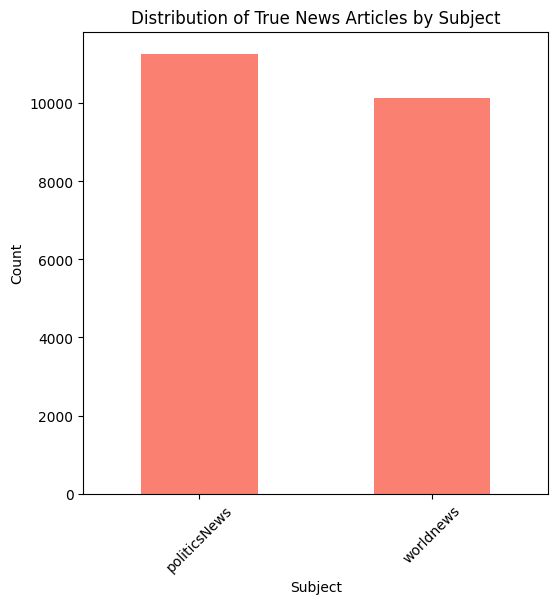

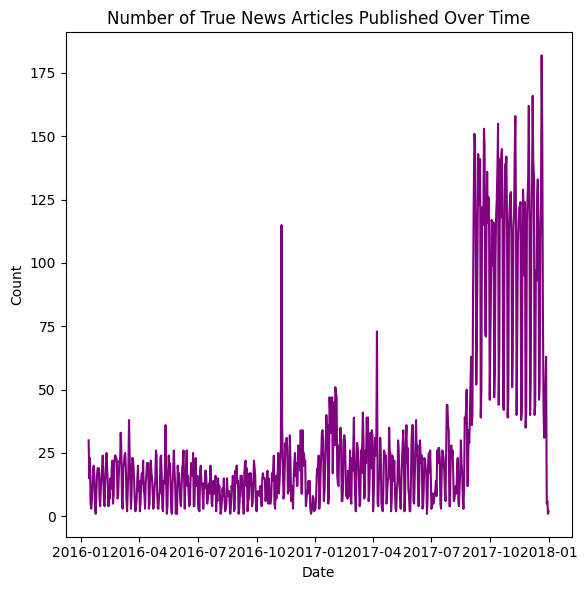

In [ ]:
# Histogram of articles by day of month
plt.figure(figsize=(6,6))
plt.hist(df_true['day'].dropna(), bins=31, color='skyblue', edgecolor='black')
plt.title('Histogram of True News Articles by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 32))
plt.show()

# Histogram of articles by month
plt.figure(figsize=(6,6))
plt.hist(df_true['month'].dropna(), bins=12, color='lightgreen', edgecolor='black')
plt.title('Histogram of True News Articles by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))
plt.show()

# Bar chart of subjects
plt.figure(figsize=(6,6))
subject_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of True News Articles by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Time series of article counts
plt.figure(figsize=(6,6))
df_true.groupby(df_true['date'].dt.date).size().plot(color='purple')
plt.title('Number of True News Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

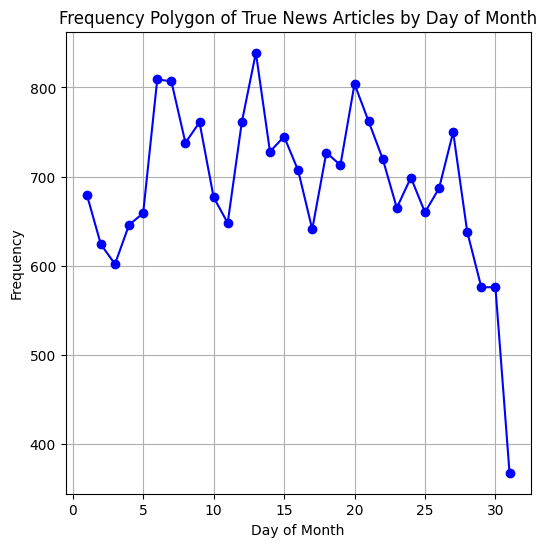

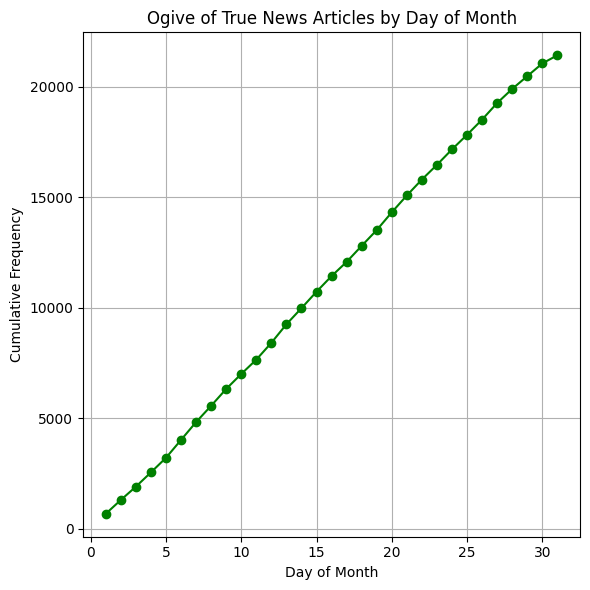

In [ ]:
# Frequency polygon of articles by day
plt.figure(figsize=(6,6))
day_counts = df_true['day'].value_counts().sort_index()
plt.plot(day_counts.index, day_counts.values, 'o-', color='blue')
plt.title('Frequency Polygon of True News Articles by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Ogive (cumulative frequency) of articles by day
plt.figure(figsize=(6,6))
day_cumulative = day_counts.sort_index().cumsum()
plt.plot(day_cumulative.index, day_cumulative.values, 'o-', color='green')
plt.title('Ogive of True News Articles by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

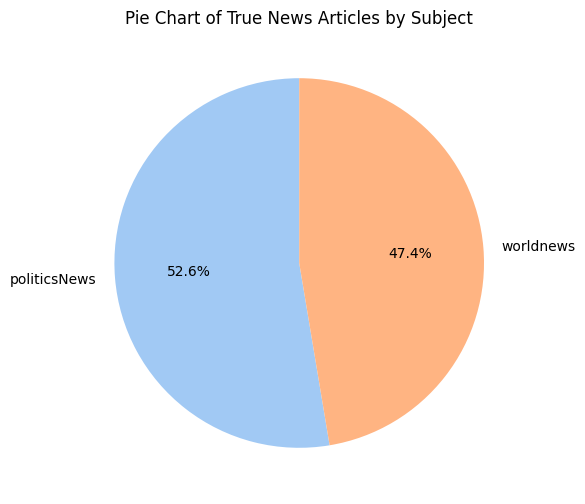

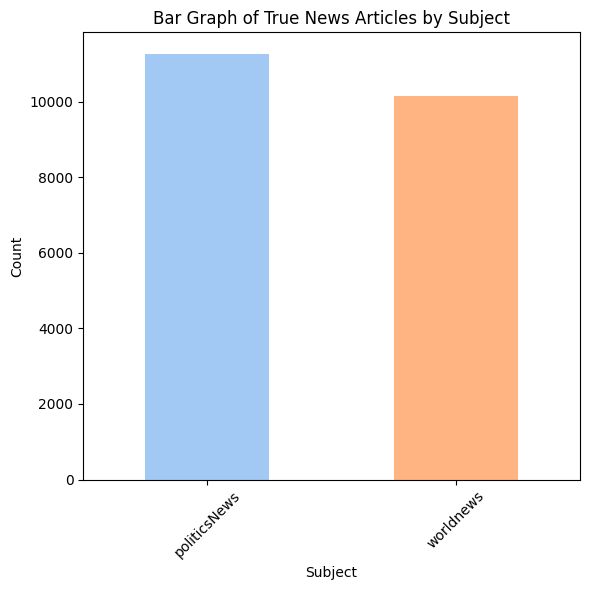

<ipython-input-24-20672ad0103c>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(subject_sorted.index, rotation=45, ha='right')


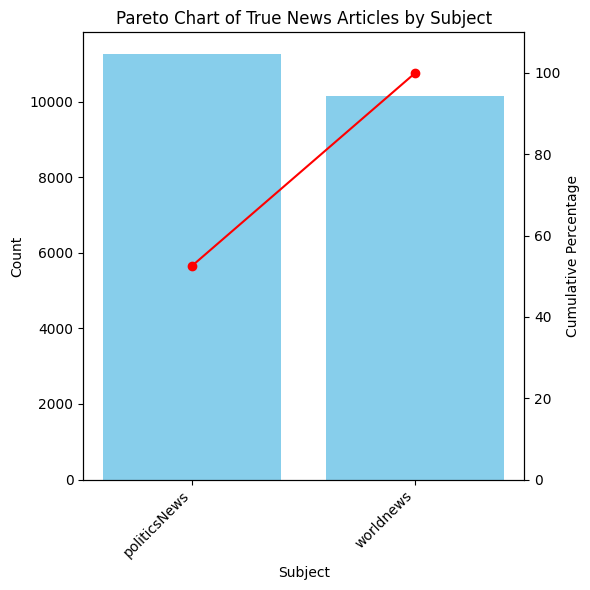

In [ ]:
# Pie chart
plt.figure(figsize=(6,6))
subject_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of True News Articles by Subject')
plt.ylabel('')  # Hide the ylabel
plt.show()

# Bar graph
plt.figure(figsize=(6,6))
subject_counts.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Bar Graph of True News Articles by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a Pareto chart for subject distribution
plt.figure(figsize=(6,6))
subject_sorted = subject_counts.sort_values(ascending=False)
cumpercentage = subject_sorted.cumsum() / subject_sorted.sum() * 100

ax1 = plt.subplot(1, 1, 1)
ax1.bar(subject_sorted.index, subject_sorted.values, color='skyblue')
ax1.set_title('Pareto Chart of True News Articles by Subject')
ax1.set_xlabel('Subject')
ax1.set_ylabel('Count')
ax1.set_xticklabels(subject_sorted.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(subject_sorted.index, cumpercentage, 'o-', color='red')
ax2.set_ylabel('Cumulative Percentage')
ax2.set_ylim([0, 110])

plt.tight_layout()
plt.show()

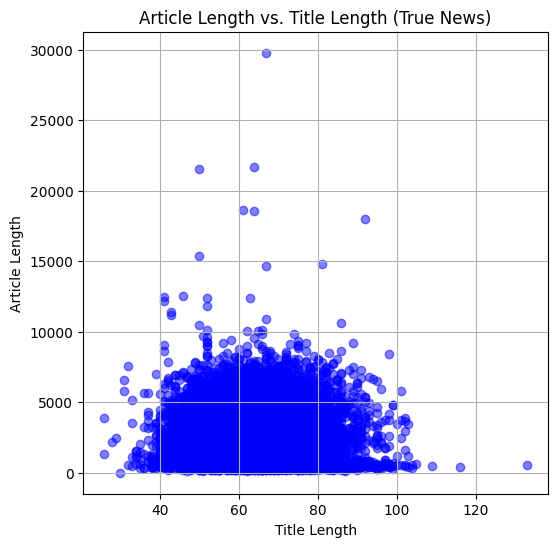

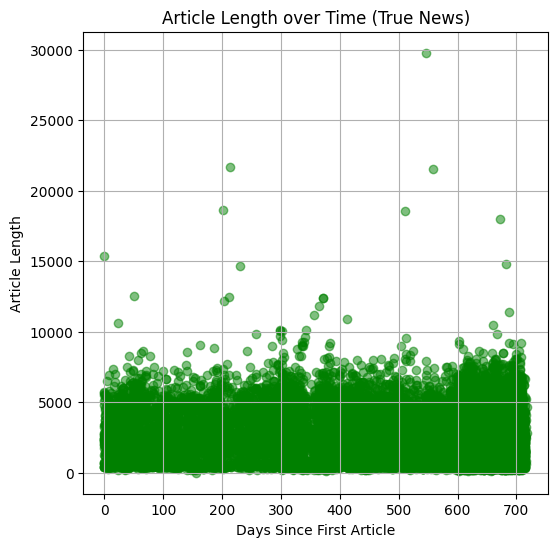

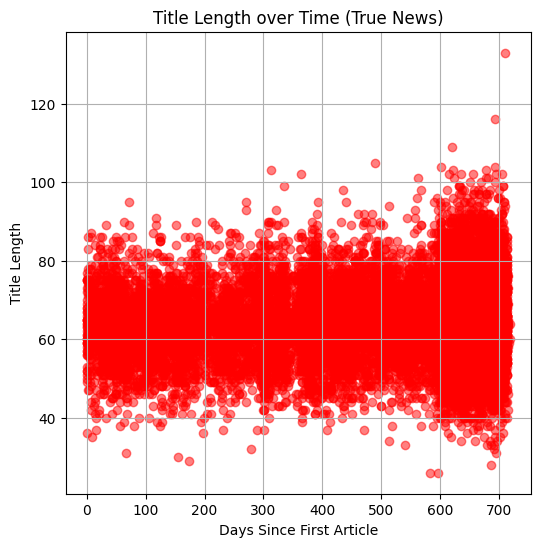

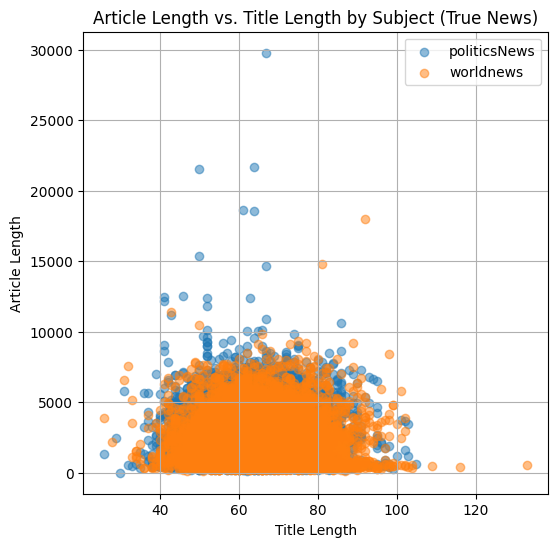

In [ ]:
# Create derived variables for text analysis
df_true['article_length'] = df_true['text'].apply(lambda x: len(str(x)))
df_true['title_length'] = df_true['title'].apply(lambda x: len(str(x)))

# Add temporal information for time-based analysis
df_true_dates = df_true.dropna(subset=['date'])
if not df_true_dates.empty:
    df_true_dates['days_since_start'] = (df_true_dates['date'] - df_true_dates['date'].min()).dt.days

    # Scatter plot of article length vs. title length
    plt.figure(figsize=(6,6))
    plt.scatter(df_true_dates['title_length'], df_true_dates['article_length'], alpha=0.5, color='blue')
    plt.title('Article Length vs. Title Length (True News)')
    plt.xlabel('Title Length')
    plt.ylabel('Article Length')
    plt.grid(True)
    plt.show()

    # Scatter plot of article length over time
    plt.figure(figsize=(6,6))
    plt.scatter(df_true_dates['days_since_start'], df_true_dates['article_length'], alpha=0.5, color='green')
    plt.title('Article Length over Time (True News)')
    plt.xlabel('Days Since First Article')
    plt.ylabel('Article Length')
    plt.grid(True)
    plt.show()

    # Scatter plot of title length over time
    plt.figure(figsize=(6,6))
    plt.scatter(df_true_dates['days_since_start'], df_true_dates['title_length'], alpha=0.5, color='red')
    plt.title('Title Length over Time (True News)')
    plt.xlabel('Days Since First Article')
    plt.ylabel('Title Length')
    plt.grid(True)
    plt.show()

    # Scatter plot with categorical variable (subject)
    plt.figure(figsize=(6,6))
    for subject in df_true_dates['subject'].unique():
        subset = df_true_dates[df_true_dates['subject'] == subject]
        plt.scatter(subset['title_length'], subset['article_length'], alpha=0.5, label=subject)
    plt.title('Article Length vs. Title Length by Subject (True News)')
    plt.xlabel('Title Length')
    plt.ylabel('Article Length')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Calculate central tendency measures for numerical features
print("\n--- Measures of Central Tendency (True News) ---")

# For title length
print("\nTitle Length:")
title_mean = df_true['title_length'].mean()
title_median = df_true['title_length'].median()
title_mode = df_true['title_length'].mode()[0]
# Calculate weighted mean if article_length is available
title_weighted_mean = np.average(df_true['title_length'], weights=df_true['article_length'])
# Calculate geometric and harmonic means for positive values only
title_positive = df_true['title_length'][df_true['title_length'] > 0]
if len(title_positive) > 0:
    title_geometric_mean = stats.gmean(title_positive)
    title_harmonic_mean = stats.hmean(title_positive)
else:
    title_geometric_mean = title_harmonic_mean = "N/A (no positive values)"

print(f"Mean: {title_mean:.2f}")
print(f"Median: {title_median:.2f}")
print(f"Mode: {title_mode}")
print(f"Weighted Mean (weighted by article length): {title_weighted_mean:.2f}")
print(f"Geometric Mean: {title_geometric_mean if isinstance(title_geometric_mean, str) else title_geometric_mean:.2f}")
print(f"Harmonic Mean: {title_harmonic_mean if isinstance(title_harmonic_mean, str) else title_harmonic_mean:.2f}")

# For article length
print("\nArticle Length:")
article_mean = df_true['article_length'].mean()
article_median = df_true['article_length'].median()
article_mode = df_true['article_length'].mode()[0]
# Calculate geometric and harmonic means for positive values only
article_positive = df_true['article_length'][df_true['article_length'] > 0]
if len(article_positive) > 0:
    article_geometric_mean = stats.gmean(article_positive)
    article_harmonic_mean = stats.hmean(article_positive)
else:
    article_geometric_mean = article_harmonic_mean = "N/A (no positive values)"

print(f"Mean: {article_mean:.2f}")
print(f"Median: {article_median:.2f}")
print(f"Mode: {article_mode}")
print(f"Geometric Mean: {article_geometric_mean if isinstance(article_geometric_mean, str) else article_geometric_mean:.2f}")
print(f"Harmonic Mean: {article_harmonic_mean if isinstance(article_harmonic_mean, str) else article_harmonic_mean:.2f}")

# For day of month
print("\nDay of Month:")
day_mean = df_true['day'].dropna().mean()
day_median = df_true['day'].dropna().median()
day_mode = df_true['day'].dropna().mode()[0]

print(f"Mean: {day_mean:.2f}")
print(f"Median: {day_median:.2f}")
print(f"Mode: {day_mode}")

# Group by subject and calculate mean article length
subject_means = df_true.groupby('subject')['article_length'].mean().sort_values(ascending=False)
print("\nMean Article Length by Subject:")
print(subject_means)


--- Measures of Central Tendency (True News) ---

Title Length:
Mean: 64.67
Median: 64.00
Mode: 64
Weighted Mean (weighted by article length): 64.35
Geometric Mean: 64.01
Harmonic Mean: 63.34

Article Length:
Mean: 2383.28
Median: 2222.00
Mode: 482
Geometric Mean: 1779.38
Harmonic Mean: 1160.55

Day of Month:
Mean: 15.64
Median: 15.00
Mode: 13

Mean Article Length by Subject:
subject
politicsNews    2549.489975
worldnews       2198.602760
Name: article_length, dtype: float64


In [ ]:
# Calculate quartiles, deciles, and percentiles
print("\n--- Quartiles, Deciles, and Percentiles (True News) ---")

# For title length
title_quartiles = np.percentile(df_true['title_length'].dropna(), [25, 50, 75])
title_deciles = np.percentile(df_true['title_length'].dropna(), np.arange(10, 100, 10))
title_percentiles = np.percentile(df_true['title_length'].dropna(), [1, 5, 10, 25, 50, 75, 90, 95, 99])

print("\nTitle Length:")
print(f"Quartiles (25%, 50%, 75%): {title_quartiles}")
print(f"Deciles: {title_deciles}")
print(f"Key Percentiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): {title_percentiles}")

# For article length
article_quartiles = np.percentile(df_true['article_length'].dropna(), [25, 50, 75])
article_deciles = np.percentile(df_true['article_length'].dropna(), np.arange(10, 100, 10))
article_percentiles = np.percentile(df_true['article_length'].dropna(), [1, 5, 10, 25, 50, 75, 90, 95, 99])

print("\nArticle Length:")
print(f"Quartiles (25%, 50%, 75%): {article_quartiles}")
print(f"Deciles: {article_deciles}")
print(f"Key Percentiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): {article_percentiles}")


--- Quartiles, Deciles, and Percentiles (True News) ---

Title Length:
Quartiles (25%, 50%, 75%): [59. 64. 70.]
Deciles: [53. 57. 60. 62. 64. 66. 69. 72. 76.]
Key Percentiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): [43. 50. 53. 59. 64. 70. 76. 80. 89.]

Article Length:
Quartiles (25%, 50%, 75%): [ 914. 2222. 3237.]
Deciles: [ 498.   698.2 1248.  1785.  2222.  2528.  2894.  3685.  4772. ]
Key Percentiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): [ 277.    413.    498.    914.   2222.   3237.   4772.   5518.2  7097.52]


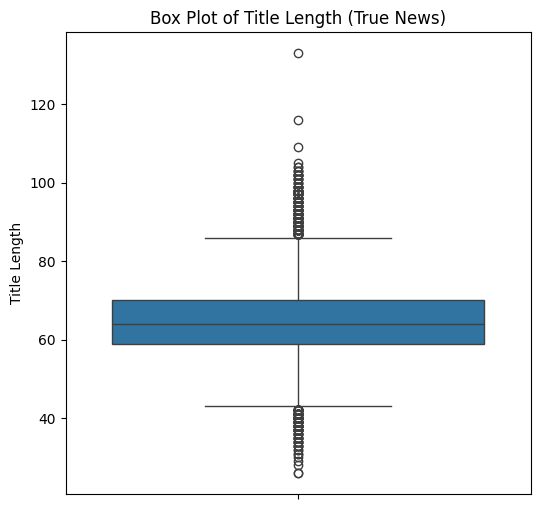

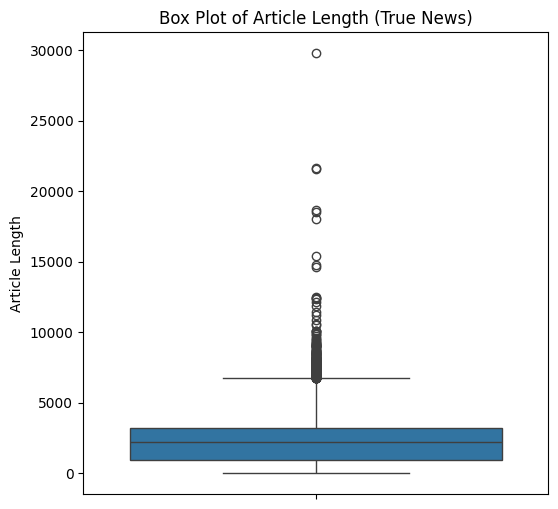

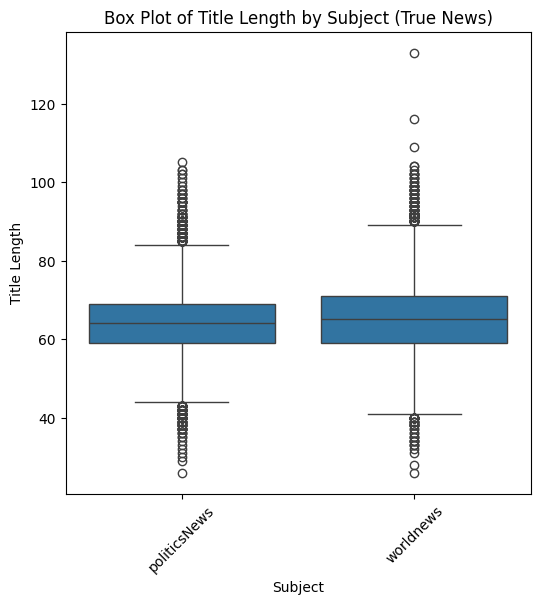

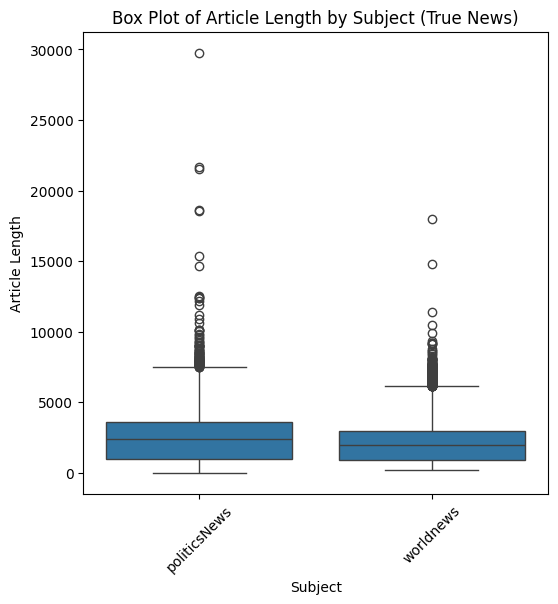

In [ ]:
# Box plot for title length
plt.figure(figsize=(6,6))
sns.boxplot(y=df_true['title_length'])
plt.title('Box Plot of Title Length (True News)')
plt.ylabel('Title Length')
plt.show()

# Box plot for article length
plt.figure(figsize=(6,6))
sns.boxplot(y=df_true['article_length'])
plt.title('Box Plot of Article Length (True News)')
plt.ylabel('Article Length')
plt.show()

# Box plot for title length by subject
plt.figure(figsize=(6,6))
sns.boxplot(x='subject', y='title_length', data=df_true)
plt.title('Box Plot of Title Length by Subject (True News)')
plt.xlabel('Subject')
plt.ylabel('Title Length')
plt.xticks(rotation=45)
plt.show()

# Box plot for article length by subject
plt.figure(figsize=(6,6))
sns.boxplot(x='subject', y='article_length', data=df_true)
plt.title('Box Plot of Article Length by Subject (True News)')
plt.xlabel('Subject')
plt.ylabel('Article Length')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate measures of variability and dispersion
print("\n--- Measures of Variability and Dispersion (True News) ---")

# For title length
title_range = df_true['title_length'].max() - df_true['title_length'].min()
title_var = df_true['title_length'].var()
title_std = df_true['title_length'].std()
title_pop_var = df_true['title_length'].var(ddof=0)
title_pop_std = df_true['title_length'].std(ddof=0)
title_skewness = df_true['title_length'].skew()
title_kurtosis = df_true['title_length'].kurt()

print("\nTitle Length:")
print(f"Range: {title_range}")
print(f"Variance (Sample): {title_var:.2f}")
print(f"Standard Deviation (Sample): {title_std:.2f}")
print(f"Variance (Population): {title_pop_var:.2f}")
print(f"Standard Deviation (Population): {title_pop_std:.2f}")
print(f"Skewness: {title_skewness:.2f}")
print(f"Kurtosis: {title_kurtosis:.2f}")

# For article length
article_range = df_true['article_length'].max() - df_true['article_length'].min()
article_var = df_true['article_length'].var()
article_std = df_true['article_length'].std()
article_pop_var = df_true['article_length'].var(ddof=0)
article_pop_std = df_true['article_length'].std(ddof=0)
article_skewness = df_true['article_length'].skew()
article_kurtosis = df_true['article_length'].kurt()

print("\nArticle Length:")
print(f"Range: {article_range}")
print(f"Variance (Sample): {article_var:.2f}")
print(f"Standard Deviation (Sample): {article_std:.2f}")
print(f"Variance (Population): {article_pop_var:.2f}")
print(f"Standard Deviation (Population): {article_pop_std:.2f}")
print(f"Skewness: {article_skewness:.2f}")
print(f"Kurtosis: {article_kurtosis:.2f}")

# Apply Chebyshev's theorem
print("\n--- Chebyshev's Theorem Application (True News) ---")
k_values = [1, 2, 3]
for feature in ['title_length', 'article_length']:
    mean = df_true[feature].mean()
    std = df_true[feature].std()
    print(f"\nFor {feature}:")
    for k in k_values:
        lower_bound = mean - k * std
        upper_bound = mean + k * std
        percentage = df_true[(df_true[feature] >= lower_bound) & (df_true[feature] <= upper_bound)].shape[0] / df_true.shape[0] * 100
        print(f"Within {k} standard deviations ({lower_bound:.2f} to {upper_bound:.2f}): {percentage:.2f}% of data")


--- Measures of Variability and Dispersion (True News) ---

Title Length:
Range: 107
Variance (Sample): 84.07
Standard Deviation (Sample): 9.17
Variance (Population): 84.07
Standard Deviation (Population): 9.17
Skewness: 0.24
Kurtosis: 0.85

Article Length:
Range: 29780
Variance (Sample): 2838671.44
Standard Deviation (Sample): 1684.84
Variance (Population): 2838538.90
Standard Deviation (Population): 1684.80
Skewness: 1.39
Kurtosis: 7.03

--- Chebyshev's Theorem Application (True News) ---

For title_length:
Within 1 standard deviations (55.50 to 73.84): 70.02% of data
Within 2 standard deviations (46.33 to 83.01): 95.01% of data
Within 3 standard deviations (37.16 to 92.17): 99.40% of data

For article_length:
Within 1 standard deviations (698.44 to 4068.11): 64.05% of data
Within 2 standard deviations (-986.39 to 5752.95): 96.06% of data
Within 3 standard deviations (-2671.23 to 7437.79): 99.29% of data
